<a href="https://www.kaggle.com/code/madushaninimeshika/mnist-nueralnetwork?scriptVersionId=215628126" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [20]:
#Imports
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

#%matplotlibinline
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn

In [21]:
dataset = MNIST(root='data/', download=True)
print(len(dataset))

60000


In [22]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

Label :  8


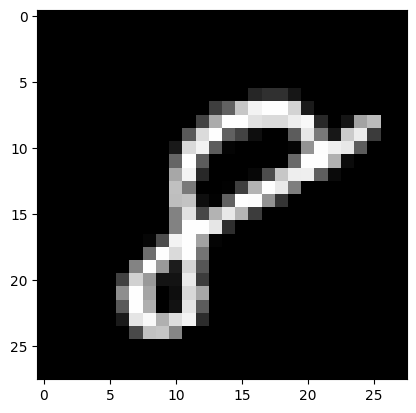

In [23]:
image, label = dataset[59999]
plt.imshow(image, cmap='gray')
print('Label : ', label)

In [24]:
#MNIST Dataset(image and labels)
mnist_dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())
print(mnist_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()


In [25]:
image_tensor, label = mnist_dataset[0]
print(image_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [26]:
print(image_tensor[:, 10:15, 10: 15])
print(torch.max(image_tensor), torch.min(image_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


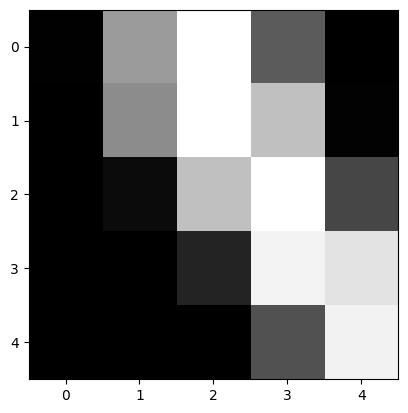

In [27]:
# Plot the image of the tensor
plt.imshow(image_tensor[0, 10:15, 10:15], cmap='gray')

In [28]:
train_data, validation_data = random_split(mnist_dataset, [50000, 10000])

# Print the length of train & validation dataset
print("Length of Train dataset : ", len(train_data))
print("Length of validation dataset : ", len(validation_data))

Length of Train dataset :  50000
Length of validation dataset :  10000


In [29]:
batch_size = 128
train_loader = DataLoader(train_data, batch_size, shuffle=True)
val_loader = DataLoader(validation_data, batch_size, shuffle=False)

# Model

In [30]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

#Logistic Regression Model
nueron = nn.Linear(input_size, num_classes)

print(nueron.weight.shape)
print(nueron.weight)

torch.Size([10, 784])
Parameter containing:
tensor([[-0.0066,  0.0266, -0.0310,  ..., -0.0157,  0.0022,  0.0318],
        [-0.0248, -0.0019,  0.0342,  ...,  0.0289, -0.0036, -0.0211],
        [ 0.0074, -0.0245,  0.0215,  ...,  0.0112,  0.0199, -0.0237],
        ...,
        [-0.0287, -0.0020,  0.0239,  ..., -0.0123,  0.0026, -0.0202],
        [-0.0272,  0.0089,  0.0317,  ..., -0.0320, -0.0159,  0.0287],
        [-0.0352,  0.0143,  0.0150,  ..., -0.0046,  0.0254,  0.0344]],
       requires_grad=True)


In [31]:
class MnistModel(nn.Module):
    def __init__(self, input_dim, output_dim=10):
        super(MnistModel, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim

        self.network = nn.Sequential(
            nn.Linear(self.input_dim, self.input_dim//2),
            nn.ReLU(),
            nn.Linear(self.input_dim//2, self.input_dim//4),
            nn.ReLU(),
            nn.Linear(self.input_dim//4, self.input_dim//8),
            nn.ReLU(),
            nn.Linear(self.input_dim//8, self.input_dim//16),
            nn.ReLU(),
            nn.Linear(self.input_dim//16, self.output_dim),
            nn.Softmax(dim=-1)
        )

        self.optimizer = optim.Adam(self.parameters(), lr=1e-5)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(device=self.device)


    def forward(self, x):
        return self.network(x)

In [32]:
model = MnistModel(input_dim=28*28)

In [33]:
model

MnistModel(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=392, bias=True)
    (1): ReLU()
    (2): Linear(in_features=392, out_features=196, bias=True)
    (3): ReLU()
    (4): Linear(in_features=196, out_features=98, bias=True)
    (5): ReLU()
    (6): Linear(in_features=98, out_features=49, bias=True)
    (7): ReLU()
    (8): Linear(in_features=49, out_features=10, bias=True)
    (9): Softmax(dim=-1)
  )
)

In [34]:
x = torch.randn(4, 784)
print(x.shape)

torch.Size([4, 784])


In [35]:
output = model(x)

In [36]:
torch.argmax(output[1])

tensor(6)

In [37]:
output[1]

tensor([0.0989, 0.1040, 0.0949, 0.0954, 0.1008, 0.1029, 0.1125, 0.0969, 0.1058,
        0.0880], grad_fn=<SelectBackward0>)